In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  thousands=',')
data= data.drop(['Pred_default (y_hat)', 'PD','Group'] , axis = 1)
train, test = train_test_split(data, test_size=0.2)



X_train = train.drop('Default (y)', axis=1)
y_train = train['Default (y)']
X_test = test.drop('Default (y)', axis=1)
y_test = test['Default (y)']

In [16]:
rf_tuned = RandomForestClassifier(criterion="gini", max_depth=10, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf_tuned.fit(X_train, y_train)
predictions_tuned = rf_tuned.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(predictions_tuned, y_test))

Accuracy: 0.797


In [22]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

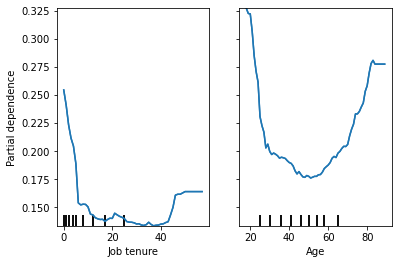

In [24]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1])
disp2 = PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1], ax=disp1.axes_)